In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from robotsim import *
from Game import *

Version:  0.2.17


In [25]:
environment=Env('sim_images/5.png')
distance_sensor,color_sensor=Sensors("us","color",None,None,environment)

833
[1.0, 1.0, 1.0]
814
[1.0, 1.0, 1.0]
795
[1.0, 1.0, 1.0]
775
[1.0, 1.0, 1.0]
756
[0.5764706134796143, 0.250980406999588, 0.20000000298023224]
736
[0.5843137502670288, 0.25882354378700256, 0.2078431397676468]
717
[1.0, 1.0, 1.0]
698
[0.6078431606292725, 0.2823529541492462, 0.23137255012989044]
678
[0.5960784554481506, 0.2705882489681244, 0.21960784494876862]
659
[0.5843137502670288, 0.25882354378700256, 0.2078431397676468]


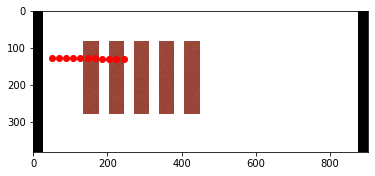

In [26]:
left,right=Motors("ab",environment)
left.power=50
for i in range(10):
    Wait(0.5)
    print(distance_sensor.value)
    print(color_sensor.value)
    
environment.draw()

In [5]:
closest_color(1,1,1,
              white=[1,1,1],
              red=[0.5921568870544434, 0.2666666805744171, 0.21568627655506134])

'white'

In [6]:
def forward(power=50):
    left.power=power

def stop():
    left.power=0
    
def backup():
    left.power=-50
    while True:
        if distance_sensor.value>830:
            break
        Wait(0.1)
        
    stop()
    
def arm_down():  # say, an arm on the right motor
    print("Putting the arm down...",end="")
    right.power=0
    Wait(0.5)
    right.power=0
    print("done.")
    

In [7]:
def forward_until_white():
    forward()
    
    while True:
        r,g,b=color_sensor.value

        current_color=closest_color(r,g,b,
                                   white=[1,1,1],
                                    red=[0.5921568870544434, 0.2666666805744171, 0.21568627655506134])
        if current_color=='white':
            break
            
        Wait(0.1)
        
    stop()            
    
def forward_until_red():
    forward()
    
    while True:
        r,g,b=color_sensor.value

        current_color=closest_color(r,g,b,
                                   white=[1,1,1],
                                    red=[0.5921568870544434, 0.2666666805744171, 0.21568627655506134])
        if current_color=='red':
            break
            
        Wait(0.1)
        
    stop()            

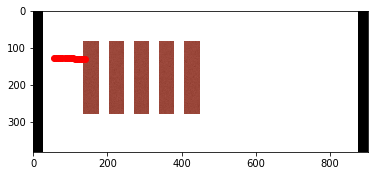

In [8]:
environment.reset()

forward_until_red()
environment.draw()

In [9]:
def forward_until_color(which_color):
    forward()
    
    while True:
        r,g,b=color_sensor.value

        current_color=closest_color(r,g,b,
                                   white=[1,1,1],
                                    red=[0.5921568870544434, 0.2666666805744171, 0.21568627655506134])
        if current_color==which_color:
            break
            
        Wait(0.1)
            
    stop()

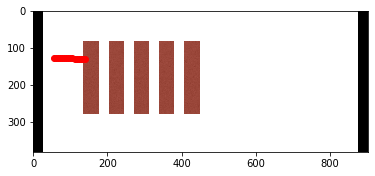

In [10]:
environment.reset()
forward_until_color("red")
environment.draw()

In [11]:
def forward_with_timeout(seconds=5):
    
    forward()
    
    t=Timer(environment)
    while True:
        if t.value>seconds:
            break
        
        Wait(0.1)
            
    stop()    

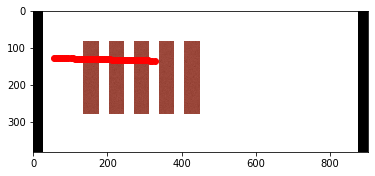

In [12]:
environment.reset()
forward_with_timeout()
environment.draw()

In [13]:
def forward_until_color_or_timeout(which_color,seconds=2.5):
    forward()
    
    t=Timer(environment)
    while True:
        r,g,b=color_sensor.value

        current_color=closest_color(r,g,b,
                                   white=[1,1,1],
                                    red=[0.5921568870544434, 0.2666666805744171, 0.21568627655506134])
        if current_color==which_color:
            return False
            
        if t.value>seconds:
            return True
            
        Wait(0.1)
            
    stop()  # put a stop at the end to make this a discrete motion

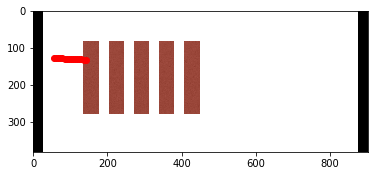

In [14]:
environment.reset()
timeout=forward_until_color_or_timeout("red")
if timeout:
    print("Command timed out")

environment.draw()

Command timed out


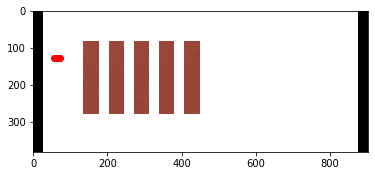

In [15]:
environment.reset()
timeout=forward_until_color_or_timeout("red",0.4)
if timeout:
    print("Command timed out")

environment.draw()

Found a stick.
Found a stick.
Found a stick.
Found a stick.
Found a stick.
Found a stick.
Found a stick.
Counted sticks 7


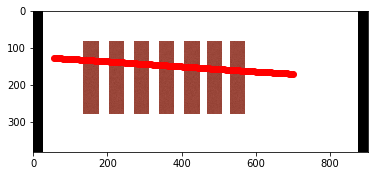

In [16]:
environment=Env('sim_images/7.png')
distance_sensor,color_sensor=Sensors("us","color",None,None,environment)
left,right=Motors("ab",environment)


count=0
while True:
    timeout=forward_until_color_or_timeout("red",2.5)
    if timeout:
        break
        
    count=count+1
    print("Found a stick.")
    timeout=forward_until_color_or_timeout("white",2.5)
    
print("Counted sticks",count)

environment.draw()

In [17]:
def read_state():
    
    count=0
    while True:
        timeout=forward_until_color_or_timeout("red",2.5)
        if timeout:
            break

        count=count+1
        print("Found a stick.")
        timeout=forward_until_color_or_timeout("white",2.5)

    print("Counted sticks",count)

    b=Board(1,21)
    for i in range(count):
        b[i]=1
        
    return b

Found a stick.
Found a stick.
Found a stick.
Found a stick.
Found a stick.
Found a stick.
Found a stick.
Counted sticks 7
 1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 



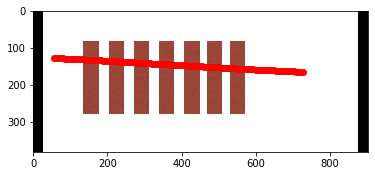

In [18]:
environment=Env('sim_images/7.png')
distance_sensor,color_sensor=Sensors("us","color",None,None,environment)
left,right=Motors("ab",environment)


b=read_state()

print(b)

environment.draw()

### we need the rules now to have agents to get the move

In [19]:
from robotsim import *
from Game import *

In [20]:
def initial_state():
    state=Board(21)
    for i in range(21):
        state[i]=1
        
    return state

def show_state(state):
    print(state)
    
def valid_moves(state,player):
    total=0
    for i in range(21):
        total=total+state[i]
        
    if total==1:
        return [1]
    elif total==2:
        return [2,1]
    else:
        return [total,total-1,total-2]
    
def win_status(state,player):
    if state[0]==0:  # took the last stick
        return 'lose'
    elif state[1]==0:  # left the last stick
        return 'win'
    
def update_state(state,player,move):
    new_state=state
    
    for  i in range(move-1,len(state)):
        new_state[i]=0
    return new_state

def human_move(state,player):
    for i in range(21):
        print("%2d " % i,end="")
    print()
    print(state)
    
    print(valid_moves(state,player))
    move=int(input("What is your move?"))
    return move


def random_move(state,player):
    moves=valid_moves(state,player)
    return random.choice(moves)

human_agent=Agent(human_move)
random_agent=Agent(random_move)

In [21]:
# g=Game()
# result=g.run(random_agent,human_agent)


In [22]:
def read_state():
    
    count=0
    while True:
        timeout=forward_until_color_or_timeout("red",2.5)
        if timeout:
            break

        count=count+1
        print("Found a stick.")
        timeout=forward_until_color_or_timeout("white",2.5)

    print("Counted sticks",count)

    b=Board(1,21)
    for i in range(count):
        b[i]=1
        
    return b

def get_move(state,player):
    return random_move(state,player)

def make_move(move):
    count=0
    while True:
        timeout=forward_until_color_or_timeout("red",2.5)
        if timeout:
            break

        count=count+1
        print("Found a stick.")
        timeout=forward_until_color_or_timeout("white",2.5)

        if count>=move:  # stop at "move" number of sticks
            break
        
    print("Stopped at",count)
    
    arm_down()
    backup()
    

Found a stick.
Found a stick.
Found a stick.
Found a stick.
Counted sticks 4
 1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

The move is  3
Found a stick.
Found a stick.
Found a stick.
Stopped at 3
Putting the arm down...done.


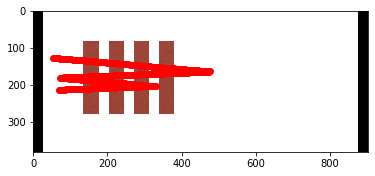

In [24]:
environment=Env('sim_images/4.png')
distance_sensor,color_sensor=Sensors("us","color",None,None,environment)
left,right=Motors("ab",environment)


b=read_state()

print(b)

backup()

move=get_move(b,1)
print("The move is ",move)

make_move(move)

environment.draw()